In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
lines = []
with open('words.wdist', 'r') as f:
    lines = [line.strip().split(',') for line in f.readlines()]

In [4]:
wdist = {}
for line in lines:
    try:
        wdist[line[0]] = np.array(line[1:]).astype(int)
    except:
        continue

In [5]:
log_wdist = {k: [max(value, 0) for value in np.log(wdist[k])] for k in wdist}

/var/folders/nc/hg68q37s2tn9f4vzk2wv981c0000gn/T/ipykernel_2619/2304485280.py:1: RuntimeWarning: divide by zero encountered in log
  log_wdist = {k: [max(value, 0) for value in np.log(wdist[k])] for k in wdist}
/var/folders/nc/hg68q37s2tn9f4vzk2wv981c0000gn/T/ipykernel_2619/2304485280.py:1: RuntimeWarning: invalid value encountered in log
  log_wdist = {k: [max(value, 0) for value in np.log(wdist[k])] for k in wdist}


KeyError: 'themes'

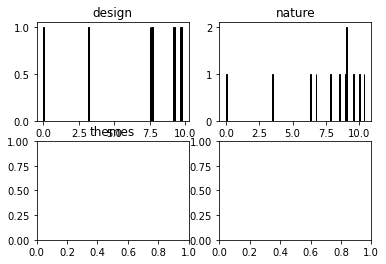

In [6]:
dim = 2
fig, axs = plt.subplots(dim, dim, figsize = (6,4))

words = [
    'design',
    'nature',
    'themes',
    'le',
]

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        word = words[dim * i + j]
        ax.set_title(word)
        ax.hist(log_wdist[word], edgecolor='black', linewidth=1, bins=150)

fig.tight_layout()
plt.show()

In [7]:
BINS = np.arange(0, 15, 0.1)

def get_histogram(data):
    try:
        return np.histogram(data, bins=BINS)[0]
    except:
        return []

In [8]:
histograms = np.array(
    list(filter(
        lambda d: len(d) > 0,
        [get_histogram(log_wdist[word]) for word in log_wdist]
    ))
)

In [9]:
from sklearn.preprocessing import normalize

X = normalize(histograms)

# Get label from Wikipedia articles title

In [10]:
SUBJECTS = ['data_mining', 'precalculus', 'geometry', 'physics']

titles = np.concatenate([os.listdir(os.path.join(subject, 'intro')) for subject in SUBJECTS])

In [32]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# stop_words = []

In [33]:
import re

tokens = set(np.concatenate([re.findall('[a-z0-9]+', title[:-4].lower()) for title in titles]))
tokens = [token for token in tokens if token not in stop_words]

In [34]:
tokens

['hill',
 'material',
 'single',
 'recall',
 'sensitivity',
 'limit',
 'nonlinear',
 'ohm',
 'color',
 'exponential',
 'standing',
 'degree',
 'polar',
 'slope',
 'engineering',
 'field',
 'arithmetic',
 'electric',
 'fuzzy',
 'scaling',
 'commutative',
 'theory',
 'origin',
 'dependence',
 'reflection',
 'minor',
 'orientation',
 'ii',
 'machine',
 'prior',
 'deviation',
 'determinant',
 'microscope',
 'vertex',
 'regression',
 'characteristic',
 'linkage',
 'rarefaction',
 'ammeter',
 'posterior',
 'hypothesis',
 'sign',
 'force',
 'existential',
 'errors',
 'vector',
 'circuits',
 'distributive',
 'topology',
 'tree',
 'property',
 'web',
 'equation',
 'frequency',
 'laser',
 'mining',
 'rotational',
 'density',
 'plane',
 'formula',
 'zero',
 'phase',
 'language',
 'random',
 'graph',
 'element',
 'arc',
 'hexagon',
 'line',
 'convex',
 'median',
 'le',
 'refraction',
 'ohmmeter',
 'level',
 'independent',
 'hierarchical',
 'selection',
 'descriptive',
 'even',
 'inelastic',
 'obtu

In [35]:
words_idx = {w: i for i, w in enumerate(list(log_wdist.keys()))}

In [36]:
y = np.array([int(w in tokens) for w in log_wdist])

In [37]:
voc0 = set(np.concatenate([re.findall('[a-zA-Z0-9]+', w) for w in list(log_wdist.keys())]))

voc = np.array(list(voc0))

In [38]:
list(voc)

['Periodic',
 'height',
 'types',
 'paths',
 'symbolically',
 'Friction',
 'chosen',
 'remain',
 'Carl',
 'forecasts',
 'increasing',
 'Albert',
 'prior',
 'manageable',
 'registering',
 'inductive',
 'indicates',
 'antiferromagnetic',
 'volt',
 'errors',
 'tree',
 'undecim',
 'ease',
 'streamlines',
 'rotational',
 'goire',
 'tower',
 'plucking',
 'multilayer',
 'Semiconductor',
 'traced',
 'removal',
 'remaining',
 'interpreting',
 'circumradius',
 'hierarchical',
 'creates',
 'Calculations',
 'horn',
 'antiderivative',
 'establishes',
 'fast',
 'fewer',
 'telegraphy',
 'agree',
 'fittest',
 'Under',
 'Mixture',
 'resolving',
 'dimensional',
 'backward',
 'Ptolemy',
 'digitized',
 'interaction',
 'contraction',
 'identified',
 'conditional',
 'formalized',
 'clear',
 'varieties',
 'polynomial',
 'dissipates',
 'admits',
 'apples',
 'carrier',
 'amplitude',
 'wherever',
 'postulate',
 'frame',
 'exist',
 'eigendecomposition',
 'injective',
 'detection',
 'imply',
 'abnormal',
 'radian

# Train

In [39]:
from keras.layers import Input, Dense, Dropout, Lambda, Conv1D, Flatten, MaxPooling1D
from keras.models import Model

from sklearn.model_selection import train_test_split

In [40]:
train_idx, test_idx = train_test_split(range(len(X)), test_size=0.20, shuffle=True)

X_r = X.reshape((X.shape[0], -1, 1))

X_train, X_test, y_train, y_test = X_r[train_idx, :], X_r[test_idx, :], y[train_idx], y[test_idx]

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Input((X.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
  8/292 [..............................] - ETA: 2s - loss: 0.6236 - accuracy: 0.8945  

2022-04-25 16:24:48.360233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


292/292 [==============================] - 2s 7ms/step - loss: 0.1604 - accuracy: 0.9503
Epoch 2/15
292/292 [==============================] - 2s 7ms/step - loss: 0.1131 - accuracy: 0.9541
Epoch 3/15
292/292 [==============================] - 2s 7ms/step - loss: 0.1124 - accuracy: 0.9622
Epoch 4/15
292/292 [==============================] - 2s 7ms/step - loss: 0.1118 - accuracy: 0.9621
Epoch 5/15
292/292 [==============================] - 2s 7ms/step - loss: 0.1087 - accuracy: 0.9649
Epoch 6/15
292/292 [==============================] - 2s 7ms/step - loss: 0.1079 - accuracy: 0.9649
Epoch 7/15
292/292 [==============================] - 2s 7ms/step - loss: 0.1068 - accuracy: 0.9651
Epoch 8/15
292/292 [==============================] - 2s 7ms/step - loss: 0.1078 - accuracy: 0.9649
Epoch 9/15
292/292 [==============================] - 2s 7ms/step - loss: 0.1058 - accuracy: 0.9645
Epoch 10/15
292/292 [==============================] - 2s 7ms/step - loss: 0.1054 - accuracy: 0.9649
Epoch 11/1

In [44]:
from sklearn.metrics import f1_score, classification_report

In [45]:
y_pred = (model.predict(X_test).reshape(1, -1)[0] > .5).astype(int)

2022-04-25 16:25:20.870330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [46]:
f1_score(y_test, y_pred)

0.5333333333333333

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2236
           1       0.59      0.48      0.53        99

    accuracy                           0.96      2335
   macro avg       0.78      0.74      0.76      2335
weighted avg       0.96      0.96      0.96      2335



In [50]:
result_df = pd.DataFrame({
    'word': voc[test_idx],
    'label': y_test,
    'pred': y_pred,
})

In [49]:
result_df[(result_df.label == 0) & (result_df.pred == 1)].head(50)

NameError: name 'result_df' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

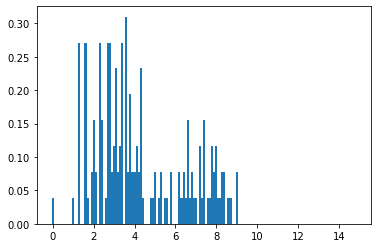

In [29]:
plt.bar(BINS[:-1], X[words_idx['vector']], width=0.1)
plt.show

In [163]:
titles_tokens = [re.findall('[a-zA-Z0-9]+', title[:-4].lower()) for title in titles]

In [164]:
len(titles)

575